In [92]:
from pandas import read_excel
import seaborn as sns
import pandas as pd
import numpy as np
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

# Common sklearn Model Helpers
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [93]:
df_sourcefile = pd.read_csv('merged_output2.csv', dtype={7: str})
#df_sourcefile = pd.read_csv('merged_output2.csv')
df_sourcefile['visit_from_app'] = df_sourcefile['visit_from_app'].fillna(False)
df_sourcefile[['product_quantity_purchased','product_ids_purchased','timeOnSite','bounces', 'tot_revenue']] = df_sourcefile[['product_quantity_purchased','product_ids_purchased','timeOnSite','bounces', 'tot_revenue']].fillna(0)

In [94]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Your code here
df_sourcefile.head()

,date,customerId,country,city,visitStartTime,browser,deviceCategory,visit_from_app,utm_medium,channelGrouping,pageviews,timeOnSite,bounces,interaction_hits,products_impressions,store_locator,add_to_wishlist,contact_customercare,set_product_alert,products_added_to_cart,products_removed_from_cart,products_refunded,visit_with_add_to_cart,visit_with_remove_from_cart,visit_with_purchase,visit_with_checkout,visit_with_productDetailView,visit_with_productListView,product_ids_purchased,product_quantity_purchased,tot_revenue
0,2020-03-29,oY7j71UviueL2fZ2dDzhgw==,Spain,Almeria,1585449203,Opera,desktop,False,(none),Direct,9.0,68.0,0.0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,2020-03-29,dmAI35xDBk2eKlvN2eO/fA==,France,Merignac,1585494956,Opera,desktop,False,referral,Social,1.0,0.0,1.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2,2020-03-29,0DGLiPbuyyJ3sEphwIc1MA==,Spain,Valencia,1585492448,Opera,desktop,False,referral,Social,5.0,53.0,0.0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0
3,2020-03-29,I0jeXoV4pyvk/J5X0qNk8Q==,Italy,Palermo,1585477780,Opera,desktop,False,nl,(Other),3.0,25.0,0.0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0
4,2020-03-29,sT3BdpItZ4Hl7IxR9VGiQg==,Ukraine,Kamianske,1585481024,YaBrowser,mobile,False,email,(Other),5.0,62.0,0.0,1,48,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0


In [95]:
# Show NaN values in the dataframe
nan_values = df_sourcefile.isna().sum()

# Count the number of NaN values
nan_count = nan_values.sum()

# Print the NaN values and count
print("NaN values:")
print(nan_values)
print("Total NaN count:", nan_count)

NaN values:
date                                 0
customerId                           0
country                              0
city                                 9
visitStartTime                       0
browser                              0
deviceCategory                       0
visit_from_app                       0
utm_medium                           0
channelGrouping                      0
pageviews                       101822
timeOnSite                           0
bounces                              0
interaction_hits                     0
products_impressions                 0
store_locator                        0
add_to_wishlist                      0
contact_customercare                 0
set_product_alert                    0
products_added_to_cart               0
products_removed_from_cart           0
products_refunded                    0
visit_with_add_to_cart               0
visit_with_remove_from_cart          0
visit_with_purchase                  0
visit_with_ch

dealing with pageviews NaN using prediction

In [96]:
df_sourcefile.columns

Index(['date', 'customerId', 'country', 'city', 'visitStartTime', 'browser',
       'deviceCategory', 'visit_from_app', 'utm_medium', 'channelGrouping',
       'pageviews', 'timeOnSite', 'bounces', 'interaction_hits',
       'products_impressions', 'store_locator', 'add_to_wishlist',
       'contact_customercare', 'set_product_alert', 'products_added_to_cart',
       'products_removed_from_cart', 'products_refunded',
       'visit_with_add_to_cart', 'visit_with_remove_from_cart',
       'visit_with_purchase', 'visit_with_checkout',
       'visit_with_productDetailView', 'visit_with_productListView',
       'product_ids_purchased', 'product_quantity_purchased', 'tot_revenue'],
      dtype='object')

I filled the NaN with the median. I wanted to Impute based on related features but I didn't have the enough hardware to do on such a large dataset

In [97]:
# Show NaN values in the dataframe
nan_values = df_sourcefile.isna().sum()

# Count the number of NaN values
nan_count = nan_values.sum()

# Print the NaN values and count
print("NaN values:")
print(nan_values)
print("Total NaN count:", nan_count)

NaN values:
date                                 0
customerId                           0
country                              0
city                                 9
visitStartTime                       0
browser                              0
deviceCategory                       0
visit_from_app                       0
utm_medium                           0
channelGrouping                      0
pageviews                       101822
timeOnSite                           0
bounces                              0
interaction_hits                     0
products_impressions                 0
store_locator                        0
add_to_wishlist                      0
contact_customercare                 0
set_product_alert                    0
products_added_to_cart               0
products_removed_from_cart           0
products_refunded                    0
visit_with_add_to_cart               0
visit_with_remove_from_cart          0
visit_with_purchase                  0
visit_with_ch

In [98]:
df_sourcefile.head()

,date,customerId,country,city,visitStartTime,browser,deviceCategory,visit_from_app,utm_medium,channelGrouping,pageviews,timeOnSite,bounces,interaction_hits,products_impressions,store_locator,add_to_wishlist,contact_customercare,set_product_alert,products_added_to_cart,products_removed_from_cart,products_refunded,visit_with_add_to_cart,visit_with_remove_from_cart,visit_with_purchase,visit_with_checkout,visit_with_productDetailView,visit_with_productListView,product_ids_purchased,product_quantity_purchased,tot_revenue
0,2020-03-29,oY7j71UviueL2fZ2dDzhgw==,Spain,Almeria,1585449203,Opera,desktop,False,(none),Direct,9.0,68.0,0.0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,2020-03-29,dmAI35xDBk2eKlvN2eO/fA==,France,Merignac,1585494956,Opera,desktop,False,referral,Social,1.0,0.0,1.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2,2020-03-29,0DGLiPbuyyJ3sEphwIc1MA==,Spain,Valencia,1585492448,Opera,desktop,False,referral,Social,5.0,53.0,0.0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0
3,2020-03-29,I0jeXoV4pyvk/J5X0qNk8Q==,Italy,Palermo,1585477780,Opera,desktop,False,nl,(Other),3.0,25.0,0.0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0
4,2020-03-29,sT3BdpItZ4Hl7IxR9VGiQg==,Ukraine,Kamianske,1585481024,YaBrowser,mobile,False,email,(Other),5.0,62.0,0.0,1,48,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0


In [99]:
df_sourcefile.dtypes

date                             object
customerId                       object
country                          object
city                             object
visitStartTime                    int64
browser                          object
deviceCategory                   object
visit_from_app                   object
utm_medium                       object
channelGrouping                  object
pageviews                       float64
timeOnSite                      float64
bounces                         float64
interaction_hits                  int64
products_impressions              int64
store_locator                     int64
add_to_wishlist                   int64
contact_customercare              int64
set_product_alert                 int64
products_added_to_cart            int64
products_removed_from_cart        int64
products_refunded                 int64
visit_with_add_to_cart            int64
visit_with_remove_from_cart       int64
visit_with_purchase               int64


changing the date into a float

In [100]:
df_sourcefile

,date,customerId,country,city,visitStartTime,browser,deviceCategory,visit_from_app,utm_medium,channelGrouping,pageviews,timeOnSite,bounces,interaction_hits,products_impressions,store_locator,add_to_wishlist,contact_customercare,set_product_alert,products_added_to_cart,products_removed_from_cart,products_refunded,visit_with_add_to_cart,visit_with_remove_from_cart,visit_with_purchase,visit_with_checkout,visit_with_productDetailView,visit_with_productListView,product_ids_purchased,product_quantity_purchased,tot_revenue
0,2020-03-29,oY7j71UviueL2fZ2dDzhgw==,Spain,Almeria,1585449203,Opera,desktop,False,(none),Direct,9.0,68.0,0.0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000
1,2020-03-29,dmAI35xDBk2eKlvN2eO/fA==,France,Merignac,1585494956,Opera,desktop,False,referral,Social,1.0,0.0,1.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000
2,2020-03-29,0DGLiPbuyyJ3sEphwIc1MA==,Spain,Valencia,1585492448,Opera,desktop,False,referral,Social,5.0,53.0,0.0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.000
3,2020-03-29,I0jeXoV4pyvk/J5X0qNk8Q==,Italy,Palermo,1585477780,Opera,desktop,False,nl,(Other),3.0,25.0,0.0,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.000
4,2020-03-29,sT3BdpItZ4Hl7IxR9VGiQg==,Ukraine,Kamianske,1585481024,YaBrowser,mobile,False,email,(Other),5.0,62.0,0.0,1,48,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308142,2022-01-09,lkr2hY1+CG6AXRFM50Cacg==,Italy,Messina,1641748664,Samsung Internet,mobile,False,cpc,Generic Paid Search,31.0,1738.0,0.0,21,273,0,0,0,0,6,4,0,1,1,0,1,1,1,0,0.0,0.000
11308143,2022-01-09,vktAO9SDlAWcVaUcYC5t1Q==,Spain,Madrid,1641756453,Samsung Internet,mobile,False,cpc,Generic Paid Search,24.0,1616.0,0.0,15,236,0,0,0,0,1,0,0,1,0,1,1,1,1,-4989609575481390935;-6016026716401324825;-310...,10.0,43.275
11308144,2022-01-09,mmpfgwehGxSyKJgpAAuyHQ==,Germany,Munich,1641761301,Samsung Internet,mobile,False,cpc,Generic Paid Search,1.0,1.0,0.0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1747945795830944841;-1076721677795236539;-4903...,12.0,56.775
11308145,2022-01-09,jAKJRCLbb8uLhIHI/8A+tQ==,Spain,Madrid,1641737791,Samsung Internet,mobile,False,cpc,Generic Paid Search,22.0,659.0,0.0,21,52,0,0,0,0,8,2,0,1,1,1,1,1,1,8920616013215334436;-4860466377246805703;-8219...,12.0,41.205


grouping by unique IDs

In [101]:
import pandas as pd
from datetime import datetime

# Load the data into a DataFrame
df = df_sourcefile.copy()

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define the fixed date for recency calculation
fixed_date = datetime(2022, 3, 18)

# Group by 'customerId' and calculate the required metrics
result = df.groupby('customerId').agg(
    minDate=('date', 'min'),
    maxDate=('date', 'max'),
    country=('country', lambda x: x.mode()[0] if not x.mode().empty else None),
    city=('city', lambda x: x.mode()[0] if not x.mode().empty else None),
    browser=('browser', lambda x: x.mode()[0] if not x.mode().empty else None),
    device=('deviceCategory', lambda x: x.mode()[0] if not x.mode().empty else None),
    app=('visit_from_app', lambda x: x.mode()[0] if not x.mode().empty else None),
    utm=('utm_medium', lambda x: x.mode()[0] if not x.mode().empty else None),
    channel=('channelGrouping', lambda x: x.mode()[0] if not x.mode().empty else None),
    pgview=('pageviews', 'mean'),
    mintimeonsite=('timeOnSite', 'min'),
    maxtimeonsite=('timeOnSite', 'max'),
    bounces=('bounces', 'max'),
    hits=('interaction_hits', 'mean'),
    impr=('products_impressions', 'mean'),
    wish=('add_to_wishlist', 'max'),
    care=('contact_customercare', 'max'),
    alert=('set_product_alert', 'max'),
    addcart=('products_added_to_cart', 'max'),
    rmcart=('products_removed_from_cart', 'max'),
    refund=('products_refunded', 'max'),
    vadd=('visit_with_add_to_cart', 'max'),
    vrm=('visit_with_remove_from_cart', 'max'),
    vp=('visit_with_purchase', 'max'),
    vc=('visit_with_checkout', 'max'),
    vdv=('visit_with_productDetailView', 'max'),
    vlv=('visit_with_productListView', 'max'),
    quan=('product_quantity_purchased', 'sum'),
    rev=('tot_revenue', 'mean'),
    freq=('date', 'count')
).reset_index()

# Calculate recency and churn
result['rec'] = (fixed_date - result['maxDate']).dt.days
result['target_churn'] = result['rec'].apply(lambda x: 0 if x < 60 else 1)

# Display the resulting DataFrame
print(result)


C:\Users\pooya\AppData\Local\Temp\ipykernel_33412\1405712342.py:21: UserWarning:

Unable to sort modes: '<' not supported between instances of 'str' and 'bool'

C:\Users\pooya\AppData\Local\Temp\ipykernel_33412\1405712342.py:21: UserWarning:

Unable to sort modes: '<' not supported between instances of 'bool' and 'str'



                       customerId    minDate    maxDate         country  \
0        +++GRcoGtSSd6mS7WsDXDQ== 2020-12-13 2020-12-13           Italy   
1        +++SJgx/2IJ+dXq7vF8COg== 2021-11-28 2021-11-28           Spain   
2        +++aKiAiXhTfaqCLC/kyWA== 2021-03-16 2021-03-16          France   
3        +++rPSJqJxUybd5VQBJlRw== 2020-05-28 2020-05-29  United Kingdom   
4        +++tkVCLHtuRHFq/0FGt9A== 2020-11-30 2020-11-30           Italy   
...                           ...        ...        ...             ...   
1530299  zzzMOPFyWESW0AbDyGzLOg== 2020-07-09 2020-07-09           Spain   
1530300  zzzj3hW4oytUbaZbp6hqiw== 2021-03-05 2021-03-05           Spain   
1530301  zzzkp+wC5LHXLSmDg2F9Fg== 2020-11-21 2021-07-27        Portugal   
1530302  zzzo4dFFeMwz8hteZGyuUA== 2021-05-24 2021-05-24  United Kingdom   
1530303  zzzw9F58G18s/Cs1j0SgzA== 2020-12-06 2020-12-06          France   

              city          browser   device    app      utm  \
0            Padua           Chrome

In [102]:
result

,customerId,minDate,maxDate,country,city,browser,device,app,utm,channel,pgview,mintimeonsite,maxtimeonsite,bounces,hits,impr,wish,care,alert,addcart,rmcart,refund,vadd,vrm,vp,vc,vdv,vlv,quan,rev,freq,rec,target_churn
0,+++GRcoGtSSd6mS7WsDXDQ==,2020-12-13,2020-12-13,Italy,Padua,Chrome,desktop,False,cpc,(Other),5.000000,91.0,479.0,0.0,1.000000,23.500000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,2,460,1
1,+++SJgx/2IJ+dXq7vF8COg==,2021-11-28,2021-11-28,Spain,Barcelona,Safari (in-app),mobile,True,(none),Direct,4.000000,1710.0,1710.0,0.0,7.000000,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,14.0,41.940,1,110,1
2,+++aKiAiXhTfaqCLC/kyWA==,2021-03-16,2021-03-16,France,Paris,Safari,mobile,False,nl,(Other),24.000000,1109.0,1109.0,0.0,18.000000,380.000000,0,0,0,4,0,0,1,0,1,1,1,1,8.0,40.290,1,367,1
3,+++rPSJqJxUybd5VQBJlRw==,2020-05-28,2020-05-29,United Kingdom,Aberdeen,Chrome,desktop,False,organic,Organic Search,12.666667,157.0,2634.0,0.0,1.333333,15.333333,0,0,0,2,0,0,1,0,0,1,1,0,0.0,0.000,6,658,1
4,+++tkVCLHtuRHFq/0FGt9A==,2020-11-30,2020-11-30,Italy,Foggia,Android Webview,mobile,True,(none),Direct,2.000000,0.0,1124.0,0.0,13.500000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,18.0,15.555,2,473,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530299,zzzMOPFyWESW0AbDyGzLOg==,2020-07-09,2020-07-09,Spain,Madrid,Android Webview,mobile,False,(none),Direct,13.500000,0.0,1441.0,0.0,18.000000,140.000000,0,0,0,14,3,0,1,1,0,1,1,1,0.0,0.000,2,617,1
1530300,zzzj3hW4oytUbaZbp6hqiw==,2021-03-05,2021-03-05,Spain,Barcelona,Safari (in-app),mobile,True,(none),Direct,NaN,200.0,200.0,0.0,18.000000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,6.0,34.005,1,378,1
1530301,zzzkp+wC5LHXLSmDg2F9Fg==,2020-11-21,2021-07-27,Portugal,Espinho,Safari (in-app),mobile,True,(none),Direct,1.833333,34.0,1639.0,0.0,3.333333,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,22.0,13.140,6,234,1
1530302,zzzo4dFFeMwz8hteZGyuUA==,2021-05-24,2021-05-24,United Kingdom,London,Chrome,desktop,False,cpc,Branded Paid Search,11.000000,252.0,252.0,0.0,1.000000,103.000000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,1,298,1


In [103]:
# Show NaN values in the dataframe
nan_values = result.isna().sum()

# Count the number of NaN values
nan_count = nan_values.sum()

# Print the NaN values and count
print("NaN values:")
print(nan_values)
print("Total NaN count:", nan_count)

NaN values:
customerId           0
minDate              0
maxDate              0
country              0
city                 0
browser              0
device               0
app                  0
utm                  0
channel              0
pgview           10311
mintimeonsite        0
maxtimeonsite        0
bounces              0
hits                 0
impr                 0
wish                 0
care                 0
alert                0
addcart              0
rmcart               0
refund               0
vadd                 0
vrm                  0
vp                   0
vc                   0
vdv                  0
vlv                  0
quan                 0
rev                  0
freq                 0
rec                  0
target_churn         0
dtype: int64
Total NaN count: 10311


In [104]:
# Churn Label indicates if the employee is currently active ('No') or has left the company ('Yes')
result['target_churn'].value_counts()

target_churn
1    1309515
0     220789
Name: count, dtype: int64

In [105]:
result

,customerId,minDate,maxDate,country,city,browser,device,app,utm,channel,pgview,mintimeonsite,maxtimeonsite,bounces,hits,impr,wish,care,alert,addcart,rmcart,refund,vadd,vrm,vp,vc,vdv,vlv,quan,rev,freq,rec,target_churn
0,+++GRcoGtSSd6mS7WsDXDQ==,2020-12-13,2020-12-13,Italy,Padua,Chrome,desktop,False,cpc,(Other),5.000000,91.0,479.0,0.0,1.000000,23.500000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,2,460,1
1,+++SJgx/2IJ+dXq7vF8COg==,2021-11-28,2021-11-28,Spain,Barcelona,Safari (in-app),mobile,True,(none),Direct,4.000000,1710.0,1710.0,0.0,7.000000,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,14.0,41.940,1,110,1
2,+++aKiAiXhTfaqCLC/kyWA==,2021-03-16,2021-03-16,France,Paris,Safari,mobile,False,nl,(Other),24.000000,1109.0,1109.0,0.0,18.000000,380.000000,0,0,0,4,0,0,1,0,1,1,1,1,8.0,40.290,1,367,1
3,+++rPSJqJxUybd5VQBJlRw==,2020-05-28,2020-05-29,United Kingdom,Aberdeen,Chrome,desktop,False,organic,Organic Search,12.666667,157.0,2634.0,0.0,1.333333,15.333333,0,0,0,2,0,0,1,0,0,1,1,0,0.0,0.000,6,658,1
4,+++tkVCLHtuRHFq/0FGt9A==,2020-11-30,2020-11-30,Italy,Foggia,Android Webview,mobile,True,(none),Direct,2.000000,0.0,1124.0,0.0,13.500000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,18.0,15.555,2,473,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530299,zzzMOPFyWESW0AbDyGzLOg==,2020-07-09,2020-07-09,Spain,Madrid,Android Webview,mobile,False,(none),Direct,13.500000,0.0,1441.0,0.0,18.000000,140.000000,0,0,0,14,3,0,1,1,0,1,1,1,0.0,0.000,2,617,1
1530300,zzzj3hW4oytUbaZbp6hqiw==,2021-03-05,2021-03-05,Spain,Barcelona,Safari (in-app),mobile,True,(none),Direct,NaN,200.0,200.0,0.0,18.000000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,6.0,34.005,1,378,1
1530301,zzzkp+wC5LHXLSmDg2F9Fg==,2020-11-21,2021-07-27,Portugal,Espinho,Safari (in-app),mobile,True,(none),Direct,1.833333,34.0,1639.0,0.0,3.333333,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,22.0,13.140,6,234,1
1530302,zzzo4dFFeMwz8hteZGyuUA==,2021-05-24,2021-05-24,United Kingdom,London,Chrome,desktop,False,cpc,Branded Paid Search,11.000000,252.0,252.0,0.0,1.000000,103.000000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,1,298,1


correlation

In [127]:
import pandas as pd
# Assuming your DataFrame is named df_sourcefile
df_HR_trans = result.copy()


df_HR_trans = df_HR_trans.drop(columns=['customerId'])
df_HR_trans = df_HR_trans.drop(columns=['country'])
df_HR_trans = df_HR_trans.drop(columns=['city'])
df_HR_trans = df_HR_trans.drop(columns=['browser'])
df_HR_trans = df_HR_trans.drop(columns=['device'])
df_HR_trans['app'] = df_HR_trans['app'].astype(bool)
df_HR_trans = df_HR_trans.select_dtypes(exclude=['object'])

In [128]:
df_HR_trans

,minDate,maxDate,app,pgview,mintimeonsite,maxtimeonsite,bounces,hits,impr,wish,care,alert,addcart,rmcart,refund,vadd,vrm,vp,vc,vdv,vlv,quan,rev,freq,rec,target_churn
0,2020-12-13,2020-12-13,True,5.000000,91.0,479.0,0.0,1.000000,23.500000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,2,460,1
1,2021-11-28,2021-11-28,True,4.000000,1710.0,1710.0,0.0,7.000000,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,14.0,41.940,1,110,1
2,2021-03-16,2021-03-16,True,24.000000,1109.0,1109.0,0.0,18.000000,380.000000,0,0,0,4,0,0,1,0,1,1,1,1,8.0,40.290,1,367,1
3,2020-05-28,2020-05-29,True,12.666667,157.0,2634.0,0.0,1.333333,15.333333,0,0,0,2,0,0,1,0,0,1,1,0,0.0,0.000,6,658,1
4,2020-11-30,2020-11-30,True,2.000000,0.0,1124.0,0.0,13.500000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,18.0,15.555,2,473,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530299,2020-07-09,2020-07-09,True,13.500000,0.0,1441.0,0.0,18.000000,140.000000,0,0,0,14,3,0,1,1,0,1,1,1,0.0,0.000,2,617,1
1530300,2021-03-05,2021-03-05,True,NaN,200.0,200.0,0.0,18.000000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,6.0,34.005,1,378,1
1530301,2020-11-21,2021-07-27,True,1.833333,34.0,1639.0,0.0,3.333333,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,22.0,13.140,6,234,1
1530302,2021-05-24,2021-05-24,True,11.000000,252.0,252.0,0.0,1.000000,103.000000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,1,298,1


In [129]:
df_HR_trans.dtypes


minDate          datetime64[ns]
maxDate          datetime64[ns]
app                        bool
pgview                  float64
mintimeonsite           float64
maxtimeonsite           float64
bounces                 float64
hits                    float64
impr                    float64
wish                      int64
care                      int64
alert                     int64
addcart                   int64
rmcart                    int64
refund                    int64
vadd                      int64
vrm                       int64
vp                        int64
vc                        int64
vdv                       int64
vlv                       int64
quan                    float64
rev                     float64
freq                      int64
rec                       int64
target_churn              int64
dtype: object

In [130]:
df_HR_trans

,minDate,maxDate,app,pgview,mintimeonsite,maxtimeonsite,bounces,hits,impr,wish,care,alert,addcart,rmcart,refund,vadd,vrm,vp,vc,vdv,vlv,quan,rev,freq,rec,target_churn
0,2020-12-13,2020-12-13,True,5.000000,91.0,479.0,0.0,1.000000,23.500000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,2,460,1
1,2021-11-28,2021-11-28,True,4.000000,1710.0,1710.0,0.0,7.000000,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,14.0,41.940,1,110,1
2,2021-03-16,2021-03-16,True,24.000000,1109.0,1109.0,0.0,18.000000,380.000000,0,0,0,4,0,0,1,0,1,1,1,1,8.0,40.290,1,367,1
3,2020-05-28,2020-05-29,True,12.666667,157.0,2634.0,0.0,1.333333,15.333333,0,0,0,2,0,0,1,0,0,1,1,0,0.0,0.000,6,658,1
4,2020-11-30,2020-11-30,True,2.000000,0.0,1124.0,0.0,13.500000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,18.0,15.555,2,473,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530299,2020-07-09,2020-07-09,True,13.500000,0.0,1441.0,0.0,18.000000,140.000000,0,0,0,14,3,0,1,1,0,1,1,1,0.0,0.000,2,617,1
1530300,2021-03-05,2021-03-05,True,NaN,200.0,200.0,0.0,18.000000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,6.0,34.005,1,378,1
1530301,2020-11-21,2021-07-27,True,1.833333,34.0,1639.0,0.0,3.333333,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,22.0,13.140,6,234,1
1530302,2021-05-24,2021-05-24,True,11.000000,252.0,252.0,0.0,1.000000,103.000000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.000,1,298,1


In [131]:
# Calculate correlations with the target and sort
correlations = df_HR_trans.corr()['target_churn'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))


Most Positive Correlations: 
 rec             0.549581
target_churn    1.000000
wish                 NaN
care                 NaN
alert                NaN
Name: target_churn, dtype: float64

Most Negative Correlations: 
 maxDate         -0.549581
minDate         -0.319012
freq            -0.152909
bounces         -0.143690
maxtimeonsite   -0.134746
Name: target_churn, dtype: float64


In [132]:
df_HR_trans.columns

Index(['minDate', 'maxDate', 'app', 'pgview', 'mintimeonsite', 'maxtimeonsite',
       'bounces', 'hits', 'impr', 'wish', 'care', 'alert', 'addcart', 'rmcart',
       'refund', 'vadd', 'vrm', 'vp', 'vc', 'vdv', 'vlv', 'quan', 'rev',
       'freq', 'rec', 'target_churn'],
      dtype='object')

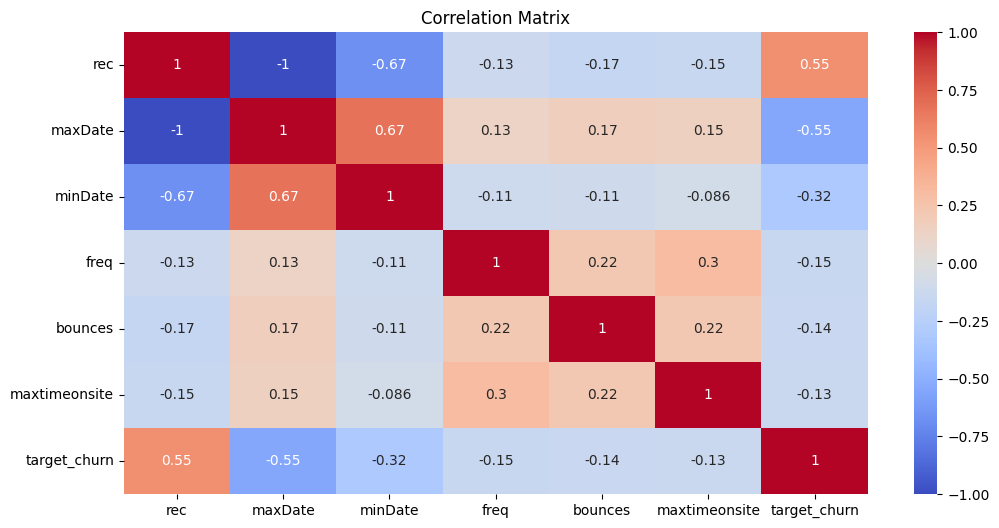

In [135]:
import pandas as pd

# Assuming df_sourcefile is your original DataFrame

# Define the columns to keep
columns_to_keep = ['rec', 'maxDate', 'minDate', 'freq', 'bounces', 'maxtimeonsite', 'target_churn']

# Select the specified columns
df_HR_trans2 = df_HR_trans[columns_to_keep]

# Calculate the correlation matrix for the selected columns
correlation_matrix = df_HR_trans2.corr()

# Create a heatmap to visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

    

In [137]:
df_HR_trans2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530304 entries, 0 to 1530303
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   rec            1530304 non-null  int64         
 1   maxDate        1530304 non-null  datetime64[ns]
 2   minDate        1530304 non-null  datetime64[ns]
 3   freq           1530304 non-null  int64         
 4   bounces        1530304 non-null  float64       
 5   maxtimeonsite  1530304 non-null  float64       
 6   target_churn   1530304 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3)
memory usage: 81.7 MB


In [138]:
df_HR_trans2

,rec,maxDate,minDate,freq,bounces,maxtimeonsite,target_churn
0,460,2020-12-13,2020-12-13,2,0.0,479.0,1
1,110,2021-11-28,2021-11-28,1,0.0,1710.0,1
2,367,2021-03-16,2021-03-16,1,0.0,1109.0,1
3,658,2020-05-29,2020-05-28,6,0.0,2634.0,1
4,473,2020-11-30,2020-11-30,2,0.0,1124.0,1
...,...,...,...,...,...,...,...
1530299,617,2020-07-09,2020-07-09,2,0.0,1441.0,1
1530300,378,2021-03-05,2021-03-05,1,0.0,200.0,1
1530301,234,2021-07-27,2020-11-21,6,0.0,1639.0,1
1530302,298,2021-05-24,2021-05-24,1,0.0,252.0,1


In [146]:
#object_columns = result.select_dtypes(include=['object']).columns
#print(object_columns)

Index(['customerId', 'country', 'city', 'browser', 'device', 'app', 'utm',
       'channel'],
      dtype='object')


In [153]:
df = df_HR_trans2.copy()

In [169]:
df

,rec,freq,bounces,maxtimeonsite,target_churn,days_diff
0,202,3,2,625,0,420
1,535,7,2,1585,1,169
2,370,7,0,2160,1,462
3,206,9,2,2531,0,547
4,171,7,2,655,1,425
...,...,...,...,...,...,...
995,153,5,2,2162,1,362
996,338,5,1,615,1,343
997,328,1,1,290,1,416
998,678,5,0,1291,0,239


In [168]:
df.dtypes

rec              int32
freq             int32
bounces          int32
maxtimeonsite    int32
target_churn     int32
days_diff        int64
dtype: object

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming the dataframe is already loaded as df
# df = pd.read_csv('your_dataframe.csv')  # Load your dataframe if it's not already in memory

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Defining features (X) and target (y)
X = df.drop(columns=['target_churn'])
y = df['target_churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions with the logistic regression model
y_pred = log_reg.predict(X_test)

# Evaluating the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


   rec  freq  bounces  maxtimeonsite  target_churn  days_diff
0  202     3        2            625             0        420
1  535     7        2           1585             1        169
2  370     7        0           2160             1        462
3  206     9        2           2531             0        547
4  171     7        2            655             1        425
Accuracy: 0.48
Confusion Matrix:
 [[52 40]
 [64 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.57      0.50        92
           1       0.52      0.41      0.46       108

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.48      0.48       200



experimenting with the data for more accuracy

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming the dataframe is already loaded as df
# df = pd.read_csv('your_dataframe.csv')  # Load your dataframe if it's not already in memory

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Defining features (X) and target (y)
X = df.drop(columns=['target_churn'])
y = df['target_churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##extra
# Training the model and capturing history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

##
# Building the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Making predictions with the neural network model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluating the neural network model
accuracy_nn = accuracy_score(y_test, y_pred)
conf_matrix_nn = confusion_matrix(y_test, y_pred)
class_report_nn = classification_report(y_test, y_pred)

print("Neural Network Accuracy:", accuracy_nn)
print("Neural Network Confusion Matrix:\n", conf_matrix_nn)
print("Neural Network Classification Report:\n", class_report_nn)


   rec  freq  bounces  maxtimeonsite  target_churn  days_diff
0  202     3        2            625             0        420
1  535     7        2           1585             1        169
2  370     7        0           2160             1        462
3  206     9        2           2531             0        547
4  171     7        2            655             1        425
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.5953 - val_accuracy: 0.5437 - val_loss: 0.6827
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - loss: 0.6089 - val_accuracy: 0.5375 - val_loss: 0.6849
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.5918 - val_accuracy: 0.5312 - val_loss: 0.6880
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6810 - loss: 0.5963 - val_accuracy: 0.5500 - val_loss: 0.6841
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6702 - loss: 0.6027 - val_accuracy: 0.5312 - val_loss: 0.690

c:\Users\pooya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4487 - loss: 0.7096 - val_accuracy: 0.5500 - val_loss: 0.6904
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 0.6848 - val_accuracy: 0.5813 - val_loss: 0.6935
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5240 - loss: 0.6922 - val_accuracy: 0.5625 - val_loss: 0.6911
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 0.6802 - val_accuracy: 0.5562 - val_loss: 0.6930
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5974 - loss: 0.6690 - val_accuracy: 0.5562 - val_loss: 0.6905
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6234 - loss: 0.6650 - val_accuracy: 0.5500 - val_loss: 0.6906
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6026 - loss: 0.6634 - val_accuracy: 0.5500 - val_loss: 0.6905
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5984 - loss: 0.6684 - val_accuracy: 0.5375 - val_loss: 0.6891
Epo

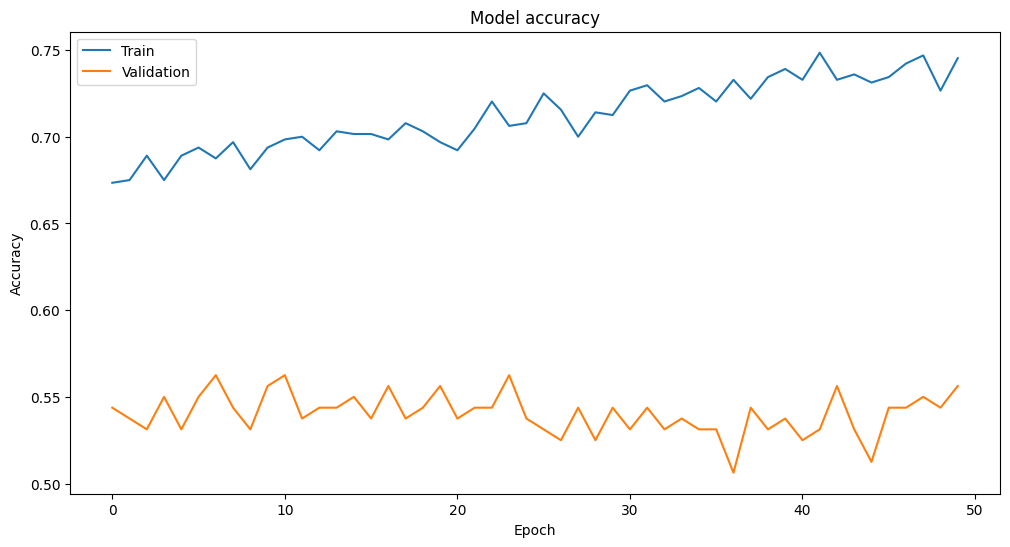

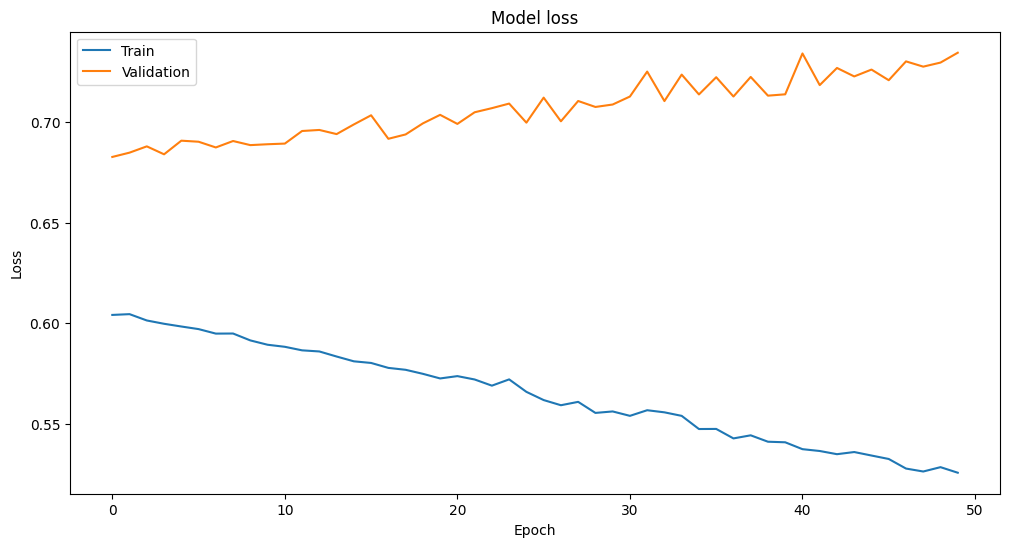

In [175]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


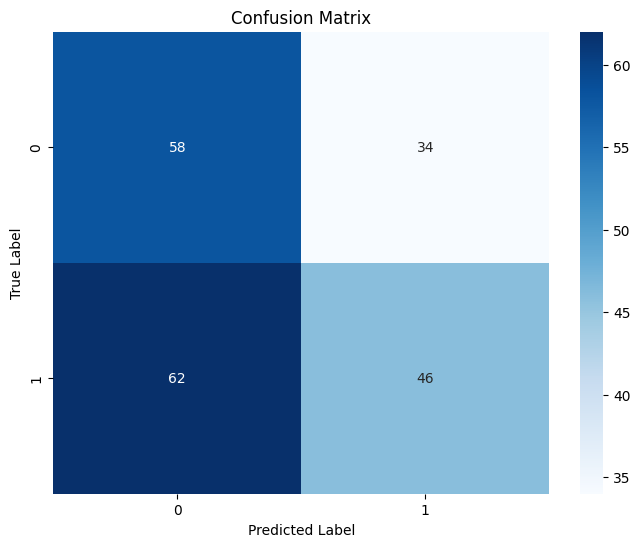

In [176]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
